In [177]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [178]:
#Load data
df_survey=pd.read_csv('survey lung cancer.csv')
#Data obtained from https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data

In [179]:
#View data
df_survey

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [180]:
#View the data type and non null count of the columns
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [181]:
#Returns description of the data. 
#You can see that all but Age are Binary factors. 
#There are 309 records.
df_survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [182]:
#Changes gender data from using 1 and 0 to Male and Female
#Changes lung chancer status from using 1 and 0 to Yes and No 
df_survey['GENDER'].replace({'M':1, 'F':0}, inplace=True)
df_survey['LUNG_CANCER'].replace({'YES':1, 'NO':0}, inplace=True)

In [183]:
#Renames column names to remove trailing spaces and underscores. 
df_survey.rename(columns={"FATIGUE ": "FATIGUE", "ALLERGY ": "ALLERGY", "YELLOW_FINGERS": "YELLOW FINGERS", "PEER_PRESSURE": "PEER PRESSURE", "LUNG_CANCER": "LUNG CANCER"}, inplace=True)

In [184]:
#No null data is ocntained in the dataset for any variable.
df_survey.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW FINGERS           0
ANXIETY                  0
PEER PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG CANCER              0
dtype: int64

In [185]:
#Reaffirms that all data but age is binary.
#There are 39 different ages in the 309 records. 
df_survey.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW FINGERS            2
ANXIETY                   2
PEER PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG CANCER               2
dtype: int64

In [186]:
#Creates histograms to visualize the distribution of the variables. 
#The patients in the study tended to be around 70 years old. The age is fairly centerd with no strong skewness. There are no patients under 20 in the dataset.
#Patients tended to report having more fatigue and more shortness of breath.
#There is a large imbalance in the patients having or not having lung cancer. This imbalance can cause the algorithms to fit patients with lung cancer better than those without. 
fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7), (ax8, ax9, ax10, ax11, ax12, ax13, ax14,ax15))=plt.subplots(nrows=2, ncols=8, figsize=(25,8))
ax0.hist(df_survey['GENDER'])
ax1.hist(df_survey['AGE'])
ax2.hist(df_survey['SMOKING'])
ax3.hist(df_survey['YELLOW FINGERS'])
ax4.hist(df_survey['ANXIETY'])
ax5.hist(df_survey['PEER PRESSURE'])
ax6.hist(df_survey['CHRONIC DISEASE'])
ax7.hist(df_survey['FATIGUE'])
ax8.hist(df_survey['ALLERGY'])
ax9.hist(df_survey['WHEEZING'])
ax10.hist(df_survey['ALCOHOL CONSUMING'])
ax11.hist(df_survey['COUGHING'])
ax12.hist(df_survey['SHORTNESS OF BREATH'])
ax13.hist(df_survey['SWALLOWING DIFFICULTY'])
ax14.hist(df_survey['CHEST PAIN'])
ax15.hist(df_survey['LUNG CANCER'])

ax0.set_title('GENDER')
ax1.set_title('AGE')
ax2.set_title('SMOKING')
ax3.set_title('YELLOW FINGERS')
ax4.set_title('ANXIETY')
ax5.set_title('PEER PRESSURE')
ax6.set_title('CHRONIC DISEASE')
ax7.set_title('FATIGUE')
ax8.set_title('ALLERGY')
ax9.set_title('WHEEZING')
ax10.set_title('ALCOHOL CONSUMING')
ax11.set_title('COUGHING')
ax12.set_title('SHORTNESS OF BREATH')
ax13.set_title('SWALLOWING DIFFICULTY')
ax14.set_title('CHEST PAIN')
ax15.set_title('LUNG CANCER')

Text(0.5, 1.0, 'LUNG CANCER')

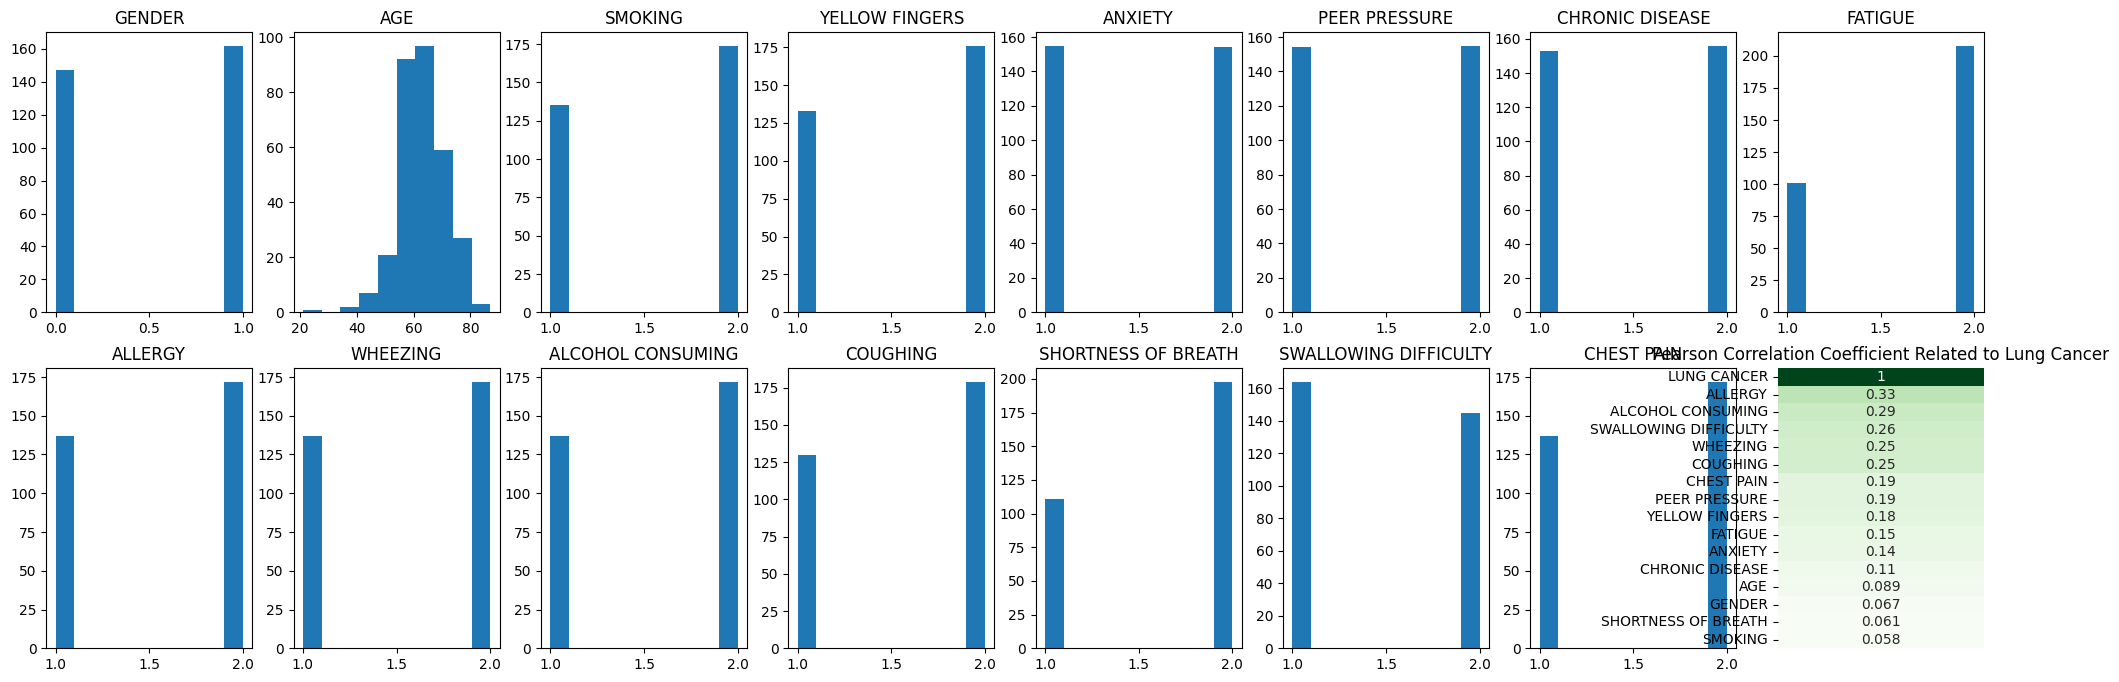

In [187]:
#Creates a graphic that has the Pearson Correlation Coefficient of the variables compared to Lung Cancer Status and sorts in descending order
#Allergies, Alcohol consumption, swallowing difficulty, wheezing, and coughing have the strongest correlation with Lung Cancer Status
#Age, Gender, Shortness of Breath, and Smoking have the lowest correlation with Lung Cancer Status
corr1 = df_survey.corr('pearson')[['LUNG CANCER']].sort_values(by='LUNG CANCER', ascending=False)
sns.heatmap(corr1, annot=True, square=False, cbar=False, cmap="Greens", xticklabels=False)
plt.title("Pearson Correlation Coefficient Related to Lung Cancer")
plt.show()

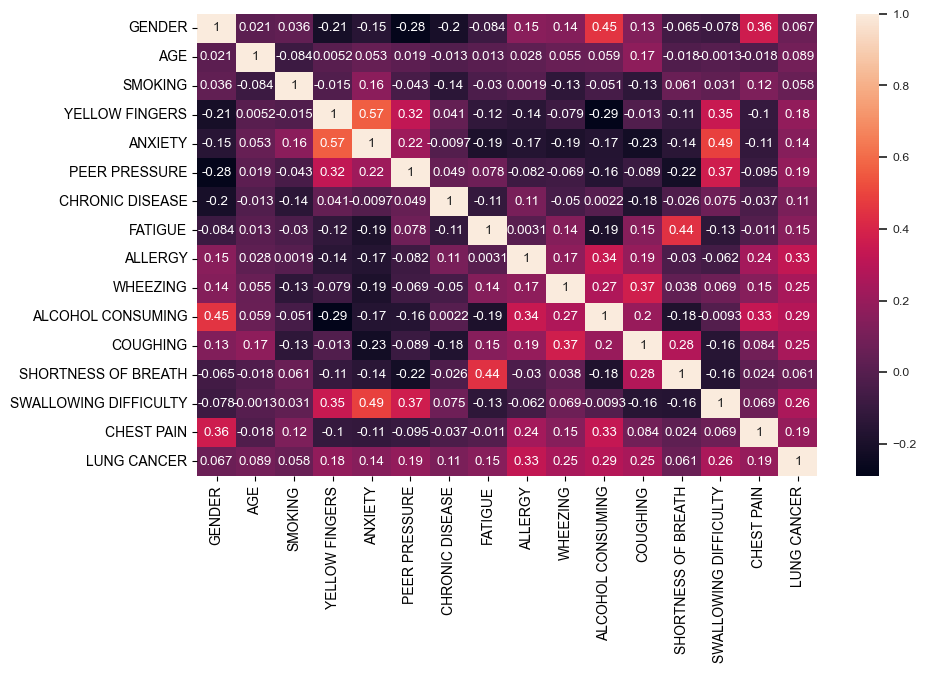

In [188]:
#Plot correlation matrix in heatmap form
#Now that we have evaluated correlation to the output, I am exploring the variables correlation with each other
#Anxiety and Yellow fingers, Alcohol Consumption and Gender, and Swallowing Difficulty and Anxiety have the strongest correlations with each other.

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale = .8)
sns.heatmap(df_survey.corr(), ax=ax, annot=True)
plt.show()

The count of cases with cancer is 270
The count of cases without cancer is 39


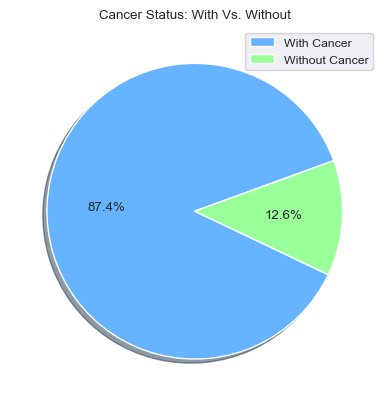

In [189]:
#Creates a figure to view the imabalance in Lung Cancer
print("The count of cases with cancer is", df_survey['LUNG CANCER'].value_counts().get(1))
print("The count of cases without cancer is", df_survey['LUNG CANCER'].value_counts().get(0))
labels=['With Cancer', 'Without Cancer']
sizes= df_survey['LUNG CANCER'].value_counts()
plt.pie(sizes, colors=['#66b3ff', '#99ff99'], autopct = '%1.1f%%', shadow=True, startangle=20)
plt.legend(labels)
plt.title('Cancer Status: With Vs. Without')
plt.show()

In [75]:
#To deal with imbalance in the output class, the minority will be oversampled.
inputs=df_survey.iloc[:,:-1]
target=df_survey.iloc[:,-1:]

#Employs the Synthetic Minority Oversampling Technique to deal with the Lung Cancer imbalance.
#Smote utilizes examples that are similar and creates synthetic cases based on the difference in the cases variables.
oversampler=SMOTE()
inputs_balanced, targets_balanced= oversampler.fit_resample(X=inputs, y=target)

In [ ]:
#displays the number of patients with Lung Cancer and Without in the datasets to confirm that the SMOTE method balanced the outputs.
print("Total positive cases in training set", y_train.sum())
print("Total negative cases in training set", len(y_train)-y_train.sum())
print("Total positive cases in testing set", y_test.sum())
print("Total negative cases in training set", len(y_test)-y_test.sum())

In [190]:
#Creates an 80/20 train test split
x_train, x_test, y_train, y_test =  train_test_split(inputs_balanced, targets_balanced, test_size=0.2, random_state=100, stratify=targets_balanced)

In [78]:
#Sets up parameters for Grid Search to find the optimal parameters for Logistic Regression and cross validation scheme
parameters= {'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['newton-cg', 'liblinear', 'sag', 'saga', 'lbfgs'], 'C': [0.01, 0.1, 1, 10, 100], 'max_iter':[50,  100, 200, 300, 400, 500, 600]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [80]:
#Performs logistic regression classificiation with a grid search to find optimal parameters and returns the best parameters found.
LogRegClassifier=GridSearchCV(LogisticRegression(), parameters, scoring='accuracy', cv=cv, error_score=0)
LogRegClassifier.fit(x_train, y_train)
print(LogRegClassifier.best_params_)


{'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'}


In [81]:
#Predicts the class and the probability of the patient having or not having lung cancer
y_test_pred=LogRegClassifier.predict(x_test)
y_test_prob=LogRegClassifier.predict_proba(x_test)[:,1]

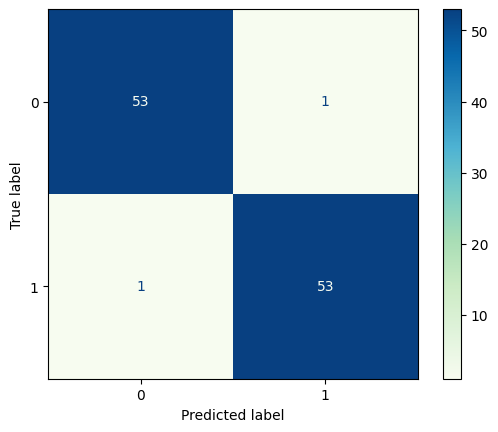

In [82]:
#Creates a confusion matrix to evaluate the classification.
#Both the true positive cases and true negative cases are predicted well. Only 1 case is predicted as a false positive and 1 case is predicted as a false negative.
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='GnBu')
plt.show()

In [83]:
#Creates a numerical classification report and data for the ROC curve that will be presented at the end of the code
report__logreg=classification_report(y_test, y_test_pred, target_names=['Without Cancer', 'With Cancer'], output_dict=True)
auc_curve_logreg = metrics.roc_auc_score(y_test, y_test_prob)
false_pos_logreg, true_pos_logreg, thresolds = metrics.roc_curve(y_test, y_test_prob)

In [85]:
#Sets up parameters for Grid Search to find the optimal parameters for K Nearest Neighbors and cross validation scheme
parameters= {'n_neighbors': range(1,21), 'weights': ['uniform', 'distance']}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [86]:
#Performs K Nearest Neighbors classificiation with a grid search to find optimal parameters and returns the best parameters found.
KNNClassifier=GridSearchCV(estimator=KNeighborsClassifier(), param_grid= parameters, scoring='accuracy', cv=cv)
KNNClassifier.fit(x_train, y_train)
KNNClassifier.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [88]:
#Predicts the class and the probability of the patient having or not having lung cancer
y_test_pred=KNNClassifier.predict(x_test)
y_test_prob=KNNClassifier.predict_proba(x_test)[:,1]

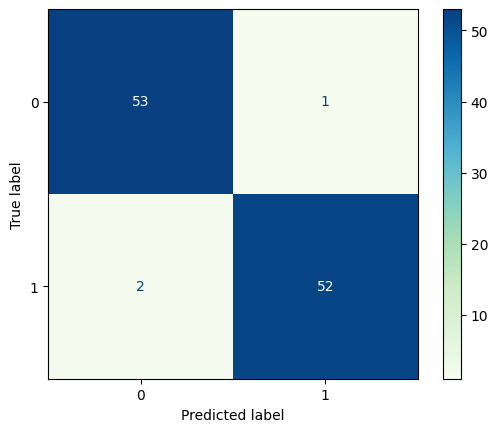

In [89]:
#Creates a confusion matrix to evaluate the classification.
#Both the true positive cases and true negative cases are predicted well. Only 1 case is predicted as a false positive and 2 cases are predicted as a false negative.
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='GnBu')
plt.show()

In [192]:
#Creates a numerical classification report and data for the ROC curve that will be presented at the end of the code
report_KNN=classification_report(y_test, y_test_pred, target_names=['Without Cancer', 'With Cancer'], output_dict=True)
auc_curve_KNN = metrics.roc_auc_score(y_test, y_test_prob)
false_pos_KNN, true_pos_KNN, thresolds = metrics.roc_curve(y_test, y_test_prob)

In [193]:
#Performs scaling in a range between -1 and 1 for the X variables. Support Vector classification's accuracy and speed are improved by scaling the input variables
scaling=MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train_scaled=scaling.transform(x_train)

In [194]:
#Sets up parameters for Grid Search to find the optimal parameters for Support Vector Classification and cross validation scheme
parameters= [
    {'kernel':['linear'], 'C': [0.5,1,5,10]},
    {'kernel':['poly'], 'C': [0.5,1,5,10]},
    {'kernel':['rbf'], 'C': [0.5,1,5,10], 'gamma': [1e-2,1e-3,1e-4,1e-5]}]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [195]:
#Performs Support Vector Classification with a grid search to find optimal parameters and returns the best parameters found.
SVMclassifier=GridSearchCV(svm.SVC(probability=True), parameters, scoring='accuracy', cv=cv)
SVMclassifier.fit(x_train_scaled, y_train.values.flatten())
print(SVMclassifier.best_params_)

{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}


In [196]:
#Predicts the class and the probability of the patient having or not having lung cancer
y_test_pred=SVMclassifier.predict(scaling.transform(x_test))
y_test_prob=SVMclassifier.predict_proba(x_test)[:,1]

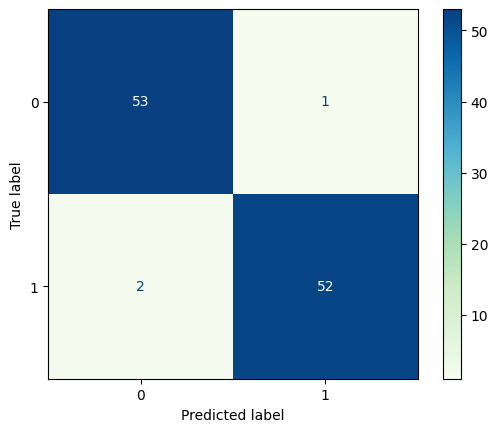

In [197]:
#Creates a confusion matrix to evaluate the classification.
#Both the true positive cases and true negative cases are predicted well. Only 1 case is predicted as a false positive and 2 cases are predicted as a false negative.
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='GnBu')
plt.show()

In [198]:
#Creates a numerical classification report and data for the ROC curve that will be presented at the end of the code
report_SVM=classification_report(y_test, y_test_pred, target_names=['Without Cancer', 'With Cancer'], output_dict=True)
auc_curve_SVM = metrics.roc_auc_score(y_test, y_test_prob)
false_pos_SVM, true_pos_SVM, thresolds = metrics.roc_curve(y_test, y_test_prob)


In [199]:
#Sets up parameters for Grid Search to find the optimal parameters for Random Forest and cross validation scheme
parameters= [
    {'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'max_features': [2, 5, 8, 11],
    'min_samples_split': [ 2, 5, 8, 11],
    'min_samples_leaf': [1, 3, 5], 
    'n_estimators': [50, 75, 100, 150, 200]}]
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [200]:
#Performs Random Forest Classification with a grid search to find optimal parameters and returns the best parameters found.
RandomForestClassifier=GridSearchCV(RandomForestClassifier(random_state=10), parameters, scoring='accuracy', cv=cv)
RandomForestClassifier.fit(x_train, y_train)
print(RandomForestClassifier.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 75}


In [201]:
#Predicts the class and the probability of the patient having or not having lung cancer
y_test_pred=RandomForestClassifier.predict(x_test)
y_test_prob=RandomForestClassifier.predict_proba(x_test)[:,1]

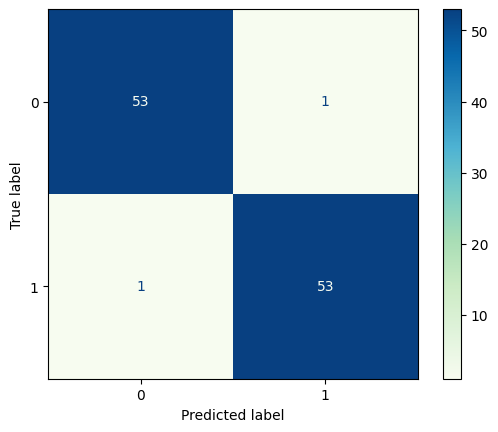

In [202]:
#Creates a confusion matrix to evaluate the classification.
#Both the true positive cases and true negative cases are predicted well. Only 1 case is predicted as a false positive and 1 case is predicted as a false negative.
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='GnBu')
plt.show()

In [203]:
#Creates a numerical classification report and data for the ROC curve that will be presented at the end of the code
report_rf=classification_report(y_test, y_test_pred, target_names=['Without Cancer', 'With Cancer'], output_dict=True)
auc_curve_rf = metrics.roc_auc_score(y_test, y_test_prob)
false_pos_rf, true_pos_rf, thresolds = metrics.roc_curve(y_test, y_test_prob)

In [204]:
#Sets up parameters for Grid Search to find the optimal parameters for Random Forest and cross validation scheme
parameters= [
    {'eta': [0.01, 0.05, 0.15, 0.3, 0.4, 0.5], 
    'n_estimators': [50, 75, 100, 150, 200], 
    'max_depth': [None, 25, 50, 100],
    'subsample': [0, 0.25, 0.5, 0.75, 1],
    'colsample_bytree': [0, 0.25, 0.5, 0.75, 1],
    'min_child_weight': [0, 0.5, 1, 3, 5] }]
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [205]:
#Performs XGBoost Classification with a grid search to find optimal parameters and returns the best parameters found.
XGBoostClassifier=GridSearchCV(XGBClassifier(), parameters, scoring='accuracy', cv=cv)
XGBoostClassifier.fit(x_train, y_train)
print(XGBoostClassifier.best_params_)

{'colsample_bytree': 0, 'eta': 0.01, 'max_depth': None, 'min_child_weight': 0, 'n_estimators': 200, 'subsample': 0.25}


In [206]:
#Predicts the class and the probability of the patient having or not having lung cancer
y_test_pred=XGBoostClassifier.predict(x_test)
y_test_prob=XGBoostClassifier.predict_proba(x_test)[:,1]

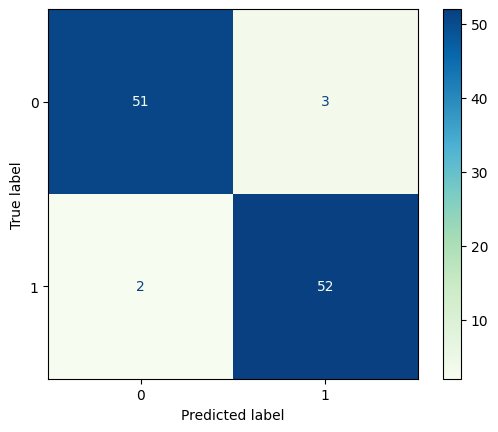

In [207]:
#Creates a confusion matrix to evaluate the classification.
#Both the true positive cases and true negative cases are predicted well. 3 cases are predicted as a false positive and 2 cases are predicted as a false negative.
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='GnBu')
plt.show()

In [208]:
#Creates a numerical classification report and data for the ROC curve that will be presented at the end of the code
report_xgb=classification_report(y_test, y_test_pred, target_names=['Without Cancer', 'With Cancer'], output_dict=True)
auc_curve_xgb = metrics.roc_auc_score(y_test, y_test_prob)
false_pos_xgb, true_pos_xgb, thresolds = metrics.roc_curve(y_test, y_test_prob)

In [217]:
#Creates a side by side classification report for easier comparison of the models
#Contains precision (Postiive Predictive Value), Recall (sensitivity), F1 Score (harmonic mean of precision and recall), and Accuracy
print('Classification Model Results'.center(225))
print('  Logistic Regression                                   KNN                                        SVM                                     Random Forest                                  XGBoost'.center(225))
print('           With Cancer      Without Cancer               With Cancer      Without Cancer           With Cancer      Without Cancer             With Cancer      Without Cancer               With Cancer      Without Cancer'.center(225))
print('Precision:', '    %0.2f' %  report__logreg['With Cancer']['precision'], '            %0.2f          ' %  report__logreg['Without Cancer']['precision'], 
      '               %0.2f' %  report_KNN['With Cancer']['precision'], '            %0.2f' %  report_KNN['Without Cancer']['precision'], 
      '                       %0.2f' %  report_SVM['With Cancer']['precision'], '            %0.2f' %  report_SVM['Without Cancer']['precision'], 
      '                       %0.2f' %  report_rf['With Cancer']['precision'], '            %0.2f' %  report_rf['Without Cancer']['precision'], 
      '                       %0.2f' %  report_xgb['With Cancer']['precision'], '            %0.2f' %  report_xgb['Without Cancer']['precision']
      
      
      )
print('Recall:', '       %0.2f' %  report__logreg['With Cancer']['recall'], '            %0.2f          ' %  report__logreg['Without Cancer']['recall'], 
      '               %0.2f' %  report_KNN['With Cancer']['recall'], '            %0.2f' %  report_KNN['Without Cancer']['recall'], 
      '                       %0.2f' %  report_SVM['With Cancer']['recall'], '            %0.2f' %  report_SVM['Without Cancer']['recall'], 
      '                       %0.2f' %  report_rf['With Cancer']['recall'], '            %0.2f' %  report_rf['Without Cancer']['recall'], 
      '                       %0.2f' %  report_xgb['With Cancer']['recall'], '            %0.2f' %  report_xgb['Without Cancer']['recall']
      
      
      )
print('F1 Score:', '     %0.2f' %  report__logreg['With Cancer']['f1-score'], '            %0.2f          ' %  report__logreg['Without Cancer']['f1-score'], 
      '               %0.2f' %  report_KNN['With Cancer']['f1-score'], '            %0.2f' %  report_KNN['Without Cancer']['f1-score'], 
      '                       %0.2f' %  report_SVM['With Cancer']['f1-score'], '            %0.2f' %  report_SVM['Without Cancer']['f1-score'], 
      '                       %0.2f' %  report_rf['With Cancer']['f1-score'], '            %0.2f' %  report_rf['Without Cancer']['f1-score'], 
      '                       %0.2f' %  report_xgb['With Cancer']['f1-score'], '            %0.2f' %  report_xgb['Without Cancer']['f1-score']
      
      
      
      )
print('Accuracy:', '              %0.2f' %  report__logreg['accuracy'], '                                         ',
      '%0.2f' %  report_KNN['accuracy'], '                                       ',
      '%0.2f' %  report_SVM['accuracy'], '                                        ',
      '%0.2f' %  report_rf['accuracy'], '                                      ',
      '%0.2f' %  report_xgb['accuracy'], '                               '
       
      
      )



                                                                                                   Classification Model Results                                                                                                  
                  Logistic Regression                                   KNN                                        SVM                                     Random Forest                                  XGBoost                
              With Cancer      Without Cancer               With Cancer      Without Cancer           With Cancer      Without Cancer             With Cancer      Without Cancer               With Cancer      Without Cancer  
Precision:     0.98             0.98                          0.98             0.96                        0.98             0.96                        0.98             0.98                        0.95             0.96
Recall:        0.98             0.98                          0.96             0.98                    

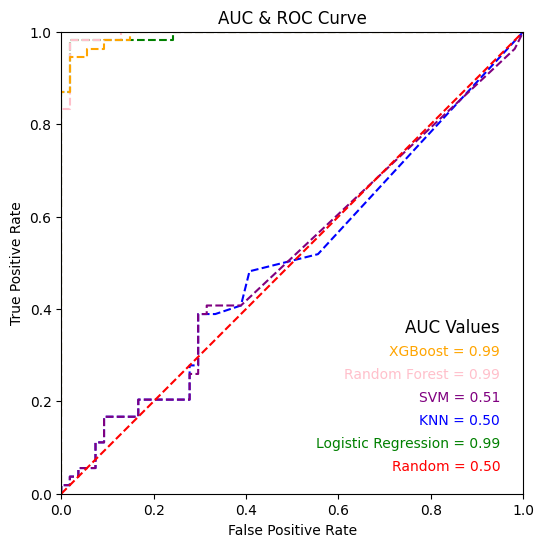

In [218]:
#Plots the ROC Curve for all models and prints the area under the curve for each
plt.figure(figsize=(6, 6), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_pos_logreg, true_pos_logreg,'--', color='green' )
plt.plot(false_pos_KNN, true_pos_KNN,'--', color='blue' )
plt.plot(false_pos_SVM, true_pos_SVM,'--', color='purple' )
plt.plot(false_pos_rf, true_pos_rf,'--', color='pink' )
plt.plot(false_pos_xgb, true_pos_xgb,'--', color='orange' )
plt.plot([0, 1], [0, 1], '--', color='red')
plt.text(0.95, 0.35, 'AUC Values' , ha='right', fontsize=12, color='Black')
plt.text(0.95, 0.1, 'Logistic Regression = %0.2f' % auc_curve_logreg, ha='right', fontsize=10, color='green')
plt.text(0.95, 0.15, 'KNN = %0.2f' % auc_curve_KNN, ha='right', fontsize=10, color='blue')
plt.text(0.95, 0.2, 'SVM = %0.2f' % auc_curve_SVM, ha='right', fontsize=10, color='purple')
plt.text(0.95, 0.25, 'Random Forest = %0.2f' % auc_curve_rf, ha='right', fontsize=10, color='pink')
plt.text(0.95, 0.3, 'XGBoost = %0.2f' % auc_curve_xgb, ha='right', fontsize=10, color='orange')
plt.text(0.95, 0.05, 'Random = 0.50' , ha='right', fontsize=10, color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [211]:
#Overall, the Logistic Regression and Random Forest models had the highest precision, recall, and accuracy at 98%. They did not misclassify false negative or false positively more. They missed only 2 classifications. Both models had the highest AUC values of 0.99.
